# Page View Time Series Visualizer

### For this project we will visualize time series data using a line chart, bar chart, and box plots. We will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. 
### The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth.

In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from datetime import datetime

In [163]:
df = pd.read_csv('fcc-forum-pageviews.csv', index_col='date', parse_dates=True)

In [164]:
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


### Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset. That means values below the 2.5th pecentile and above the 97.5th percentile

In [165]:
df = df[(df.value > df.value.quantile(.025)) & (df.value < df.value.quantile(.975))]

### Let's draw a plot for the daily page views

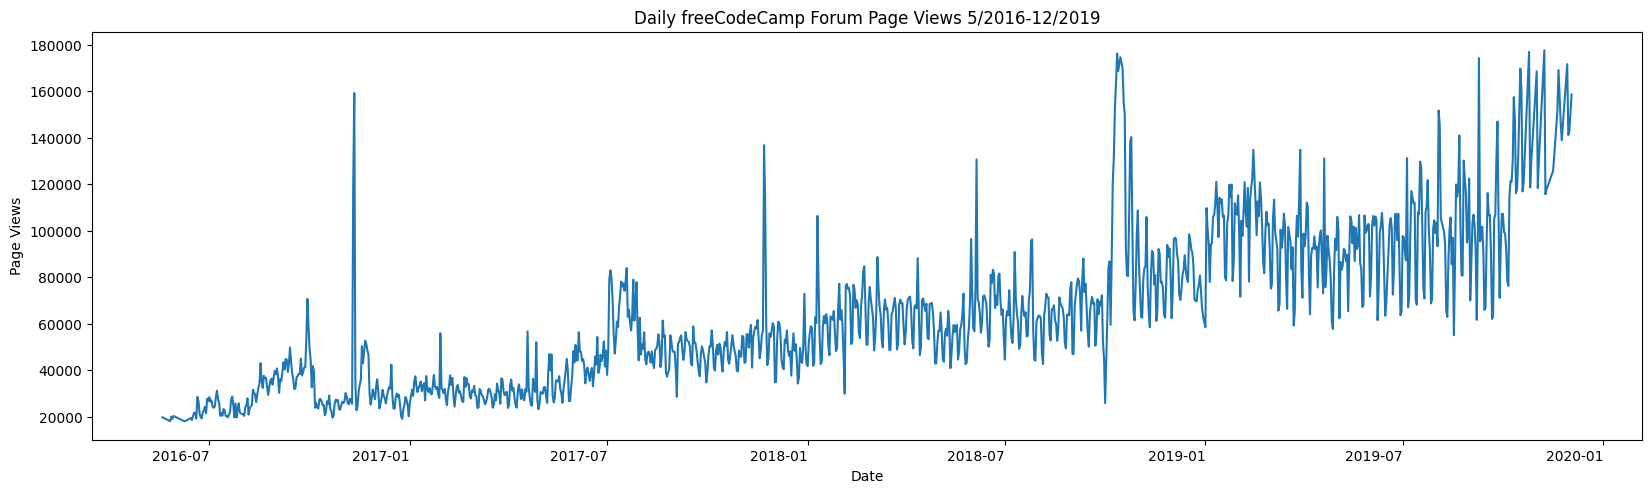

In [166]:
fig, ax = plt.subplots(figsize=(20,6))

df.plot(ax=ax, legend=None, rot=0);
ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
ax.set_ylabel('Page Views')
ax.set_xlabel('Date');

### We can group the page views by month and year. For that purpose, we create 2 columns for the year and month.

In [186]:
df_y_m = df.copy()
df_y_m['Year'] = df_y_m.index.year
# df_y_m['Month'] = df_y_m.index.strftime("%B")
df_y_m['Month'] = df_y_m.index.month

In [187]:
df_group = df_y_m.groupby(['Year', 'Month']).mean()
df_group

value
Year Month               
2016 5       19432.400000
     6       21875.105263
     7       24109.678571
     8       31049.193548
     9       41476.866667
     10      27398.322581
     11      40448.633333
     12      27832.419355
2017 1       32785.161290
     2       31113.071429
     3       29369.096774
     4       30878.733333
     5       34244.290323
     6       43577.500000
     7       65806.838710
     8       47712.451613
     9       47376.800000
     10      47438.709677
     11      57701.566667
     12      48420.580645
2018 1       58580.096774
     2       65679.000000
     3       62693.774194
     4       62350.833333
     5       56562.870968
     6       70117.000000
     7       63591.064516
     8       62831.612903
     9       65941.733333
     10     111378.142857
     11      78688.333333
     12      80047.483871
2019 1      102056.516129
     2      105968.357143
     3       91214.483871
     4       89368.433333
     5       91439.903226
     6       90435.642857
     7       97236.566667
     8      102717.310345
     9       97268.833333
     10     122802.272727
     11     143166.428571
     12     150733.500000

### Let's create a bar chart that visualizes the dataframe above (shows average daily page views for each month grouped by year)

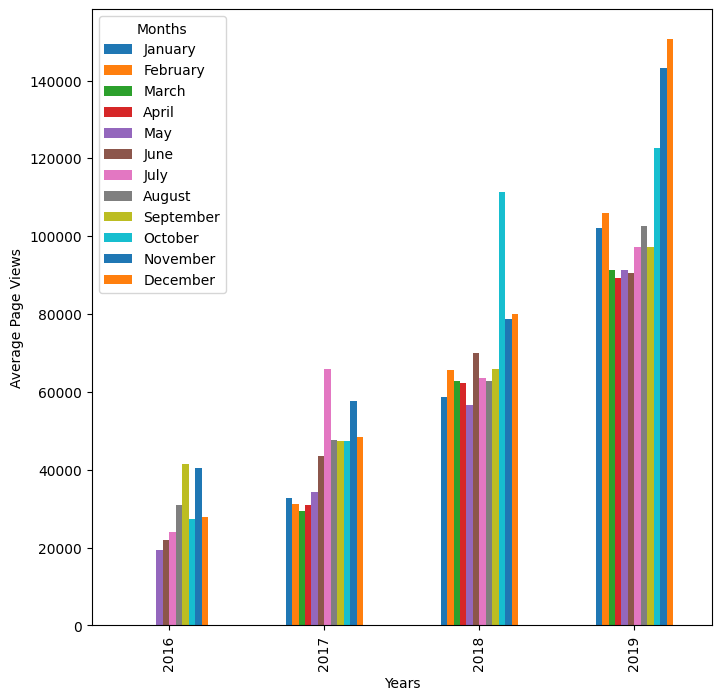

In [188]:
fig, ax = plt.subplots(figsize=(8,8))

df_bar = df_y_m
pd.pivot_table(df_group.reset_index(),
               index='Year', 
               columns='Month', 
               values='value'
              ).plot(kind='bar', xlabel='Years', 
                     ylabel='Average Page Views', 
                     ax=ax);
ax.legend(title='Months', 
          labels=[calendar.month_name[idx] for idx in range(1,13)]);

### Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. Make sure the month labels on bottom start at Jan . 

In [253]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box.head()

,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May


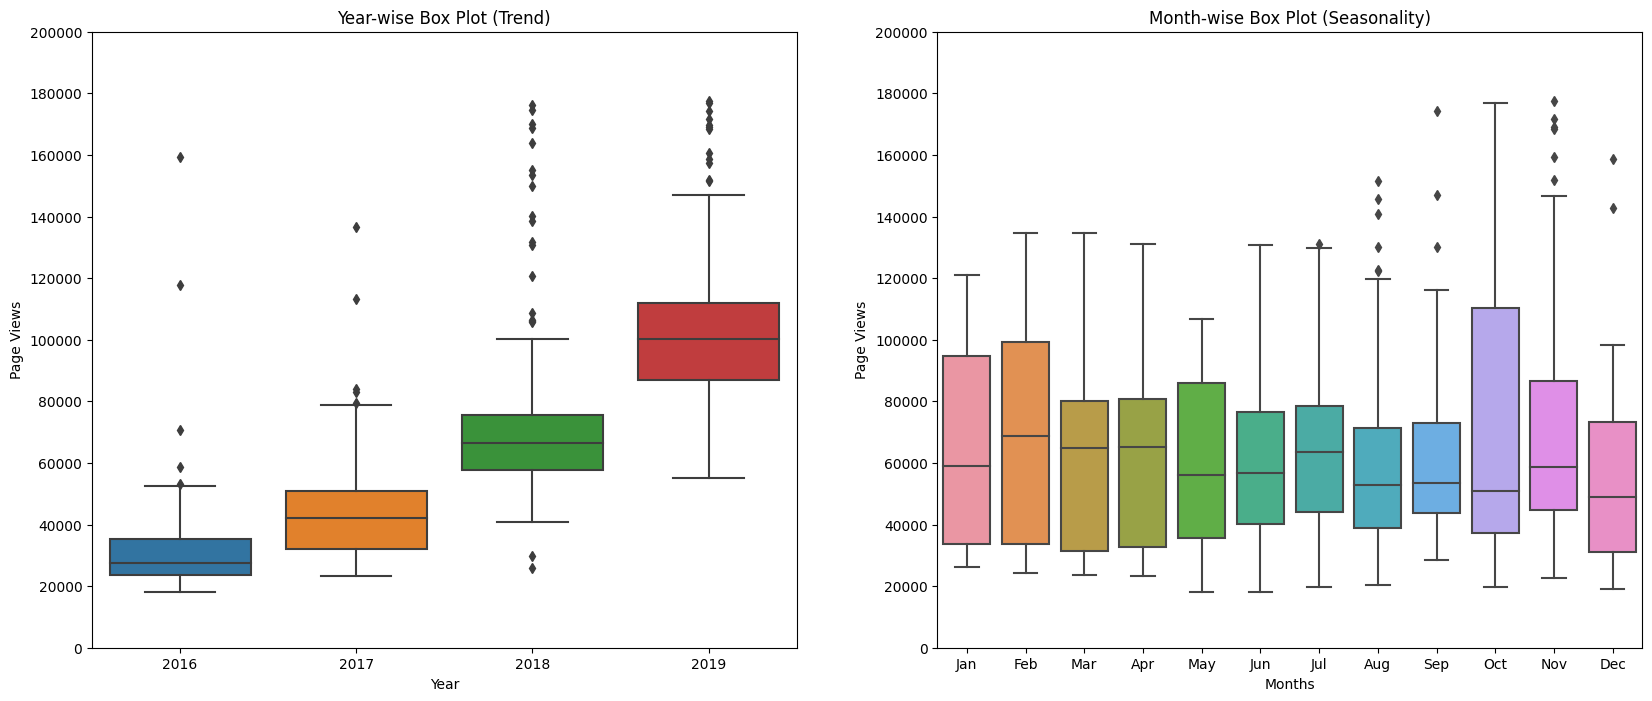

In [265]:
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(20,8))

sns.boxplot(data=df_box, 
            x='year', 
            y='value', 
            ax=ax1);
ax1.set_xlabel('Year')
ax1.set_ylabel('Page Views')
ax1.set_title('Year-wise Box Plot (Trend)')
ax1.set_yticks(np.arange(0, max(df_box['value'])+40000, 20000))

sns.boxplot(data=df_box, 
            x='month', 
            y='value',
            order=sorted(df_box['month'].unique(), key=lambda m: datetime.strptime(m, "%b")),
            ax=ax2);
ax2.set_xlabel('Months')
ax2.set_ylabel('Page Views')
ax2.set_title('Month-wise Box Plot (Seasonality)')
ax2.set_yticks(np.arange(0, max(df_box['value'])+40000, 20000));